In [12]:
import time

In [13]:
%store -r ionosphere_export
%store -r adult_export
%store -r thoracic_export
%store -r credit_export

%store -r ionosphere_headers
%store -r adult_headers
%store -r thoracic_headers
%store -r credit_headers

In [ ]:
# Set after running all the tests
best_values = {
    "k": 5,
    "lr": 0.05,
    "eps": 1e-2,
    "use_gradient": False
}


In [14]:
datasets = {
    "ionosphere": [ionosphere_export,ionosphere_headers],
    "adult": [adult_export,adult_headers],
    "thoracic_surgery": [thoracic_export,thoracic_headers],
    "credit_card": [credit_export,credit_headers]
}

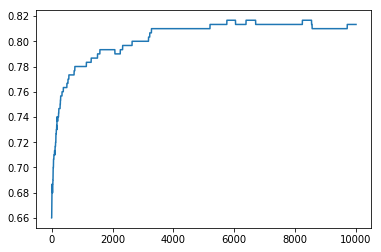

In [15]:
%run validation.ipynb

In [16]:
def run_cross_validations(datasets, k, use_lr=True,use_nb=True,model_args=[]):
    results = {}
    for name,dataset in datasets.items():
        print(name, "-----")
        print("\tRunning k_fold on: ",name)
        
        naive_results = None
        logistic_results = None
        
        if(use_lr):
            print("\tRunning Logistic Regression")
            print()
            logistic_results = k_fold_cross_validation(k,dataset[0], "LogisticRegression",model_args)
            print()
            print("\t\tAccuracy: ",logistic_results)
            print()
        if(use_nb):
            print()
            print("\tRunning Naive Bayes")
            print()
            naive_results = k_fold_cross_validation(k,dataset[0], "NaiveBayes",dataset[1],model_args)
            print()
            print("\t\tAccuracy: ",naive_results)
            print()
        results[name] = [logistic_results,naive_results]
    return results